# Climate Change and Impacts in Africa

According to the [United Nations](https://www.un.org/en/climatechange/what-is-climate-change), Climate change refers to long-term shifts in temperatures and weather patterns. Such shifts can be natural, due to changes in the sun’s activity or large volcanic eruptions. But since the 1800s, **human activities** have been the main driver of climate change, primarily due to the burning of fossil fuels like coal, oil, and gas.

The consequences of climate change now include, among others, intense droughts, water scarcity, severe fires, rising sea levels, flooding, melting polar ice, catastrophic storms, and declining biodiversity.

You work for a Non-governmental organization tasked with reporting the state of climate change in Africa at the upcoming African Union Summit. The head of analytics has provided you with [IEA-EDGAR CO2 dataset](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117) which you will clean, combine and analyze to create a report on the state of climate change in Africa. You will also provide insights on the impact of climate change on African regions (with four countries, one from each African region, as case studies). 

## Dataset

*The dataset, IEA-EDGAR CO2, is a component of the EDGAR (Emissions Database for Global Atmospheric Research) Community GHG database version 7.0 (2022) including or based on data from IEA (2021) Greenhouse Gas Emissions from Energy, www.iea.org/statistics, as modified by the Joint Research Centre. The data source was the [EDGARv7.0_GHG website](https://edgar.jrc.ec.europa.eu/dataset_ghg70) provided by Crippa *et. al.* (2022) and with [DOI](https://data.europa.eu/doi/10.2904/JRC_DATASET_EDGAR).*

The dataset contains three sheets - `IPCC 2006`, `1PCC 1996`, and `TOTALS BY COUNTRY` on the amount of CO2 (a greenhouse gas) generated by countries between 1970 and 2021. **You can download the dataset from your workspace or inspect the dataset directly [here](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117)**.

### TOTALS BY COUNTRY SHEET

This sheet contains the annual CO2 (kt) produced between 1970 - 2021 in each country. The relevant columns in this sheet are:

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |


### IPCC 2006

These sheets contain the amount of CO2 by country and the industry responsible. 

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |
| `ipcc_code_2006_for_standard_report_name` | The industry responsible for generating CO2 |

## Instructions

The head of analytics in your organization has specifically asked you to do the following:


1. Clean and tidy the datasets. 
2. Create a line plot to show the trend of `CO2` levels across the African regions.
3. Determine the relationship between time (`Year`) and `CO2` levels across the African regions.
4. Determine if there is a significant difference in the `CO2` levels among the African Regions.
5. Determine the most common (top 5) industries in each African region.
6. Determine the industry responsible for the most amount of CO2 (on average) in each African Region.
7. Predict the `CO2` levels (at each African region) in the year 2025.
8. Determine if `CO2` levels affect annual `temperature` in the selected African countries.


## IMPORTANT

- Make a copy of this workspace.

- Write your code within the cells provided for you. Each of those cells contain the comment "`#Your code here`".

- Next, run the cells containing the checks. **We've asked you not to modify these cells**. To pass a check, make sure you create the variables mentioned in the instruction tasks. They (the variables) will be verified for correctness; if the cell outputs nothing your solution passes else the cell will throw an error. We included messages to help you fix these errors. 

- If you're stuck (even after reviewing related DataCamp courses), then uncomment and run the cell which contains the source code of the solution. For example, `print(inspect.getsource(solutions.solution_one))` will display the solution for instruction 1. **We advise you to only look at the solution to your current problem.**

- Note that workspaces created inside the "I4G 23/24" group are always private to the group and cannot be made public.

- If after completion you want to showcase your work on your DataCamp portfolio, use "File > Make a copy" to copy over the workspace to your personal account. Then make it public so it shows up on your DataCamp portfolio.

- We hope you enjoy working on this project as we enjoyed creating it. Cheers!

In [2]:
# Setup
import pandas as pd
import numpy as np
import pingouin
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
import seaborn as sns
import matplotlib.pyplot as plt
import inspect

plt.style.use('ggplot')
# The sheet names containing our datasets
sheet_names = ['IPCC 2006', 'TOTALS BY COUNTRY']

# The column names of the dataset starts from rows 11
# Let's skip the first 10 rows
datasets = pd.read_excel('IEA_EDGAR_CO2_1970-2021.xlsx', sheet_name = sheet_names, skiprows = 10)

# we need only the African regions
african_regions = ['Eastern_Africa', 'Western_Africa', 'Southern_Africa', 'Northern_Africa']

ipcc_2006_africa = datasets['IPCC 2006'].query('C_group_IM24_sh in @african_regions')

totals_by_country_africa = datasets['TOTALS BY COUNTRY'].query('C_group_IM24_sh in @african_regions')


# Read the temperatures datasets containing four African countries
# One from each African Region:
# Nigeria:    West Africa
# Ethiopa :   East Africa
# Tunisia:    North Africa
# Mozambique: South Africa
temperatures = pd.read_csv('temperatures.csv')

In [3]:
# The solution code and the test runner
import tests as runner
import solutions

## Instruction 1: Clean and tidy the datasets

### Tasks

- Rename `C_group_IM24_sh` to `Region`, `Country_code_A3` to `Code`, and `ipcc_code_2006_for_standard_report_name` to `Industry` in the corresponding African datasets.
- Drop `IPCC_annex`, `ipcc_code_2006_for_standard_report`, and `Substance` from the corresponding datasets.
- Melt `Y_1970` to `Y_2021` into a two columns `Year` and `CO2`. Drop rows where `CO2` is missing.
- Convert `Year` to `int` type.

### Hints

- Use `df.rename()` method to rename columns.
- The `df.drop()` method can be used to drop columns.
- You might find `df.melt()` or `pd.melt()` useful.
- The `df.column.astype(int)` can be used to convert to a column to an integer type.

In [4]:
ipcc_2006_africa.columns

Index(['IPCC_annex', 'C_group_IM24_sh', 'Country_code_A3', 'Name',
       'ipcc_code_2006_for_standard_report',
       'ipcc_code_2006_for_standard_report_name', 'Substance', 'fossil_bio',
       'Y_1970', 'Y_1971', 'Y_1972', 'Y_1973', 'Y_1974', 'Y_1975', 'Y_1976',
       'Y_1977', 'Y_1978', 'Y_1979', 'Y_1980', 'Y_1981', 'Y_1982', 'Y_1983',
       'Y_1984', 'Y_1985', 'Y_1986', 'Y_1987', 'Y_1988', 'Y_1989', 'Y_1990',
       'Y_1991', 'Y_1992', 'Y_1993', 'Y_1994', 'Y_1995', 'Y_1996', 'Y_1997',
       'Y_1998', 'Y_1999', 'Y_2000', 'Y_2001', 'Y_2002', 'Y_2003', 'Y_2004',
       'Y_2005', 'Y_2006', 'Y_2007', 'Y_2008', 'Y_2009', 'Y_2010', 'Y_2011',
       'Y_2012', 'Y_2013', 'Y_2014', 'Y_2015', 'Y_2016', 'Y_2017', 'Y_2018',
       'Y_2019', 'Y_2020', 'Y_2021'],
      dtype='object')

In [5]:
totals_by_country_africa.columns

Index(['IPCC_annex', 'C_group_IM24_sh', 'Country_code_A3', 'Name', 'Substance',
       'Y_1970', 'Y_1971', 'Y_1972', 'Y_1973', 'Y_1974', 'Y_1975', 'Y_1976',
       'Y_1977', 'Y_1978', 'Y_1979', 'Y_1980', 'Y_1981', 'Y_1982', 'Y_1983',
       'Y_1984', 'Y_1985', 'Y_1986', 'Y_1987', 'Y_1988', 'Y_1989', 'Y_1990',
       'Y_1991', 'Y_1992', 'Y_1993', 'Y_1994', 'Y_1995', 'Y_1996', 'Y_1997',
       'Y_1998', 'Y_1999', 'Y_2000', 'Y_2001', 'Y_2002', 'Y_2003', 'Y_2004',
       'Y_2005', 'Y_2006', 'Y_2007', 'Y_2008', 'Y_2009', 'Y_2010', 'Y_2011',
       'Y_2012', 'Y_2013', 'Y_2014', 'Y_2015', 'Y_2016', 'Y_2017', 'Y_2018',
       'Y_2019', 'Y_2020', 'Y_2021'],
      dtype='object')

In [6]:
# Your code here (for the learner)
# Rename columns
ipcc_2006_africa = ipcc_2006_africa.rename(columns={
    'C_group_IM24_sh': 'Region',
    'Country_code_A3': 'Code',
    'ipcc_code_2006_for_standard_report_name': 'Industry'
})

totals_by_country_africa = totals_by_country_africa.rename(
        columns={
            'C_group_IM24_sh': 'Region',
            'Country_code_A3': 'Code'})

# Drop columns
ipcc_2006_africa = ipcc_2006_africa.drop(columns=['IPCC_annex', 'ipcc_code_2006_for_standard_report', 'Substance'])
totals_by_country_africa = totals_by_country_africa.drop(['IPCC_annex', 'Substance'], axis=1)

def melt_clean(df):
    value_vars = list(filter(lambda x: x.startswith('Y_'), df.columns))
    id_vars = list(set(df.columns).difference(value_vars))

    # melt
    long = df.melt(
        id_vars=id_vars,
        value_vars=value_vars,
        var_name='Year',
        value_name='CO2')

    # drop rows where co2 is missing
    long = long[~long.CO2.isnull()]
    
    # convert year to integer
    long.Year = long.Year.str.replace('Y_', '').astype(int)

    return long

ipcc_2006_africa = melt_clean(ipcc_2006_africa)
totals_by_country_africa = melt_clean(totals_by_country_africa)

In [7]:
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
runner.check_task_1(ipcc_2006_africa, totals_by_country_africa)

In [8]:
# Uncomment and run to view solution one
# print(inspect.getsource(solutions.solution_one))

## Instruction 2: Show the trend of `CO2` levels across the African regions

### Tasks

- Using `totals_by_country_africa`, create a line plot of `CO2` vs. `Year` in each `Region` to show the trend of CO2 levels by year.

### Hints

- Use `sns.lineplot()` to create a line plot.
- Your plot should be similar to the one shown below.

![co2_vs_year](co2_year.png)

Text(0, 0.5, 'CO2 (kt)')

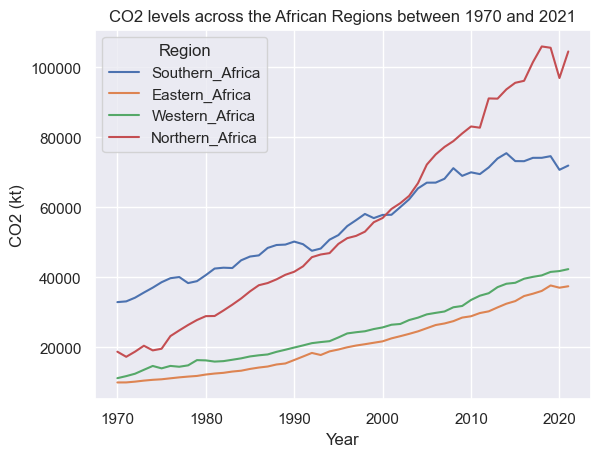

In [8]:
# Your code here

sns.set(style="darkgrid")

sns.lineplot(x="Year", y="CO2", hue="Region", data=totals_by_country_africa, ci=None)
plt.title('CO2 levels across the African Regions between 1970 and 2021')
plt.ylabel('CO2 (kt)')

In [10]:
# Uncomment and run to view solution two
# print(inspect.getsource(solutions.solution_two))

## Instruction 3: Determine the relationship between time (`Year`) and `CO2` levels across the African regions


### Tasks

- Using the `totals_by_country_africa` dataset, conduct a Spearman's correlation to determine the relationship between time (`Year`) and `CO2` within each African `Region`.
- Save the results in a variable called `relationship_btw_time_CO2`.


### Hints
- Use `df.groupby()` and `df.corr()` methods. 
- Use the `corr()` method's `method` parameter to set the correlation type.

In [12]:
# Your code here

relationship_btw_time_CO2 = totals_by_country_africa.groupby(
        'Region')[['Year', 'CO2']].corr(method='spearman')

In [13]:
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
# tests
runner.check_task_3(relationship_btw_time_CO2)

In [14]:
# Uncomment and run to view solution three
# print(inspect.getsource(solutions.solution_three))

## Instruction 4: Determine if there is a significant difference in the CO2 levels among the African Regions

### Tasks

- Using `totals_by_country_africa`, conduct an ANOVA using `pingouin.anova()` on the `CO2` by `Region`. Save the results as `aov_results`.
- Conduct a posthoc test (with Bonferroni correction) using `pingouin.pairwise_tests()` to find the source of the significant difference. Save the results as `pw_ttest_result`.
- Is it true that the `CO2` levels of the `Southern_Africa` and `Northern_Africa` region do not differ significantly? The previous task should provide you with the answer.

In [17]:
# Your code here

# Conduct ANOVA
aov_results = pingouin.anova(data=totals_by_country_africa, dv='CO2', between='Region')

# Conduct posthoc test
pw_ttest_result = pingouin.pairwise_ttests(data=totals_by_country_africa, dv='CO2', between='Region', padjust='bonf')

# Check if Southern_Africa and Northern_Africa CO2 levels differ significantly
print(pw_ttest_result)

  Contrast                A                B  ...  p-adjust       BF10    hedges
0   Region   Eastern_Africa  Northern_Africa  ...      bonf  1.554e+17 -0.801390
1   Region   Eastern_Africa  Southern_Africa  ...      bonf  4.024e+08 -0.421846
2   Region   Eastern_Africa   Western_Africa  ...      bonf      0.173 -0.059094
3   Region  Northern_Africa  Southern_Africa  ...      bonf      0.079  0.004785
4   Region  Northern_Africa   Western_Africa  ...      bonf  9.641e+10  0.418029
5   Region  Southern_Africa   Western_Africa  ...      bonf  5.437e+05  0.335300

[6 rows x 13 columns]


No, it is not true that the CO2 levels of the Southern_Africa and Northern_Africa region do not differ significantly.

The p-adjust column shows the adjusted p-values for each comparison. The comparison between Northern_Africa and Southern_Africa has an adjusted p-value of 0.079, which is not less than 0.05, so we cannot reject the null hypothesis that CO2 levels do not differ significantly between the two regions.

In [19]:
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
# tests
runner.check_task_4(aov_results, pw_ttest_result)

In [21]:
# Uncomment and run to view solution four
# print(inspect.getsource(solutions.solution_four))

## Instruction 5: Determine the most common (top 5) industries in each African region.

### Tasks

- Group the `ipcc_2006_africa` data by `Region` and `Industry`.
- Count the occurrences of each `Industry` within each `Region` and name it `Count`.
- Sort the data within each region group by `Count` in descending order
- Get the top 5 industries for each region
- save it to variable `top_5_industries` for each region.

### Hints

- You can use the `df.groupby()` method to group the data by multiple columns.
- The `df.value_counts()` function can be useful for counting occurrences.
- The `df.sort_values` function can help you with sorting.

In [20]:
# Your code here

# Group by Region and Industry, and count occurrences
industry_counts = ipcc_2006_africa.groupby(['Region', 'Industry']).size().reset_index(name='Count')

# Sort by Region and Count
industry_counts = industry_counts.sort_values(['Region', 'Count'], ascending=[True, False])

# Top 5 industries for each region
top_5_industries = industry_counts.groupby('Region').head(5).reset_index(drop=True)

In [21]:
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
# tests
runner.check_task_5(top_5_industries)

In [25]:
# Uncomment and run to view solution five
# print(inspect.getsource(solutions.solution_five))

## Instruction 6: Determine the industry responsible for the most amount of CO2 (on average) in each African Region

### Tasks

- Group the `ipcc_2006_africa` data by `Region` and `Industry`.
- Calculate the average `CO2` emissions for each group.
- Find the `Industry` with the maximum average `CO2` emissions in each region.

### Hints
- You can use the `df.groupby()` method to group the data by `Region` and `Industry`.
- The `df.mean()` function can be used to calculate the average CO2 emissions for each group.
- The `df.idxmax()` function can help you find the index of the row with the maximum average CO2 emissions within each region group.
- You can use the `df.loc[]` method to select the rows corresponding to the indices found in step 3.

In [22]:
# Your code here

# Group by Region and Industry, and average CO2 emissions
industry_co2 = ipcc_2006_africa.groupby(['Region', 'Industry'])['CO2'].mean().reset_index()

# Maximum average CO2 emissions in each region
max_co2_industries = industry_co2.loc[industry_co2.groupby('Region')['CO2'].idxmax()].reset_index(drop=True)

In [23]:
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
# tests
runner.check_task_6(max_co2_industries)

In [29]:
# Uncomment and run to view solution six
# print(inspect.getsource(solutions.solution_six))

## Instruction 7: Predict the `CO2` levels (at each African region) in the year 2025

### Tasks

- Create an instance of `LinearRegression()` and save it as `reg`.
- Fit a linear model of `CO2` (in log base 10) by `Year` and `Region` using `reg.fit()`.
- Predict the values of `CO2` using the `reg.predict()` and the data provided. Save the result as `predicted_co2`. 
- Convert `predicted_co2` values from log base 10 to decimals and round to 2 d.p using `np.round()`.


### Hints

- Use `pd.get_dummies()` on the features to one-hot-encode the `Region` column before fitting the model.
- If `Y = np.log10(X)`, then `X = 10**Y`.

In [24]:
# Your code here
# data provided for you
newdata = pd.DataFrame({ 'Year': 2025, 'Region': african_regions })
newdata = pd.get_dummies(newdata)

reg = LinearRegression()
target = np.log10(totals_by_country_africa['CO2'])
features = pd.get_dummies(totals_by_country_africa[['Year', 'Region']])
reg.fit(features, target)
predicted_co2 = reg.predict(newdata)
predicted_co2 = np.round(10**predicted_co2, 2)

In [25]:
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
# tests
runner.check_task_7(predicted_co2)

In [34]:
# Uncomment and run to view solution seven
# print(inspect.getsource(solutions.solution_seven))

## Instruction 8: Determine if CO2 levels affect annual temperature in the selected African countries

![relationship between co2 and temp](co2_temp.png)


### Tasks

- Select `Name`, `Year` and `CO2` of countries `countries`. Save the result as `selected_countries`.
- Convert `temperatures` dataset from wide to long format. Set the new column names to `Name` and `Temperature`. Save the result as `temp_long`.
- Perform an inner join between `selected_countries` and `temp_long` on `Name` and `Year`. Save the result as `joined`.
- Create a linear model of `Temperature` by `CO2` and `Name`. Save the result as `model_temp`. *The code has been added for you.*
- A one unit rise in log10 `CO2` leads to how many degrees rise in temperature? Run `model_temp.summary()` to find out!
- What is the adjusted R squared value of the model?

### Hints

- `df.melt()` converts a dataset from wide to long.
- `pd.merge()` can be used to perform all kinds of joins.

In [26]:
# Your code here
countries = ["Ethiopia", "Mozambique", "Nigeria", "Tunisia"]

selected_countries = totals_by_country_africa[['Name', 'Year', 'CO2']].query('Name in @countries')

temp_long = temperatures.melt(
        id_vars=['Year'],
        value_vars=countries,
        var_name='Name',
        value_name='Temperature')

joined = pd.merge(selected_countries, temp_long, on=['Name', 'Year'], how='inner')

# Train model
model_temp = OLS.from_formula("Temperature ~ np.log10(CO2) + Name", data = joined).fit()

# Run model summary
model_temp.summary()

# Provided for you
# Uncomment and run to complete this task
# model_temp = OLS.from_formula("Temperature ~ np.log10(CO2) + Name", data = joined).fit()
# model_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     3241.
Date:                Thu, 17 Aug 2023   Prob (F-statistic):          1.22e-182
Time:                        05:52:09   Log-Likelihood:                -54.347
No. Observations:                 208   AIC:                             118.7
Df Residuals:                     203   BIC:                             135.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.4981      0.583     23.138      0.000      12.348      14.648
Name[T.Mozambique]     2.0759      0.090     23.021      0.000       1.898       2.254
Name[T.Nigeria]        2.8345      0.092     30.884      0.000       2.654       3.016
Name[T.Tunisia]       -1.6254      0.104    -15.673      0.000      -1.830      -1.421
np.log10(CO2)          1.9472      0.117     16.620      0.000       1.716       2.178
==============================================================================
Omnibus:                        3.230   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.985
Skew:                          -0.291   Prob(JB):                        0.225
Kurtosis:                       3.073   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The adjusted R-squared value of the model is 0.984.**

In [27]:
# DO NOT MODIFY THIS CELL
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
# tests
runner.check_task_8(joined, model_temp)

In [39]:
# Uncomment and run to view solution eight
# print(inspect.getsource(solutions.solution_eight))

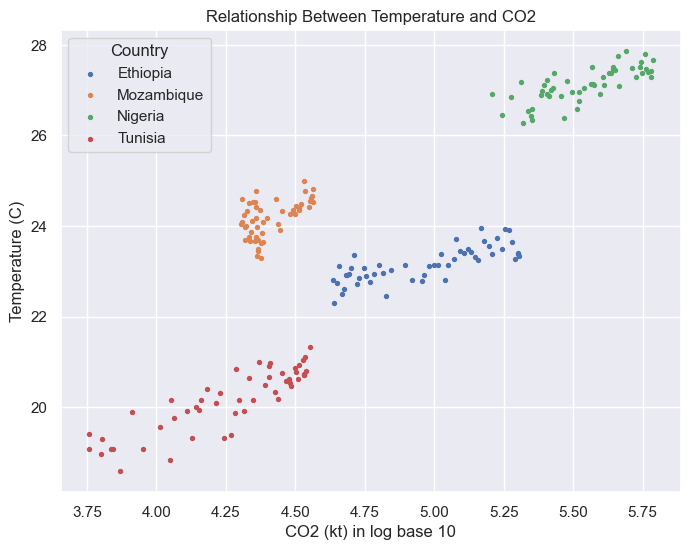

In [28]:
# Create a scatter plot of Temperature vs log10(CO2) for each country
fig, ax = plt.subplots(figsize=(8, 6))
for country in countries:
    df = joined[joined['Name'] == country]
    ax.scatter(np.log10(df['CO2']), df['Temperature'], label=country, s=8)

plt.title('Relationship Between Temperature and CO2')
ax.set_xlabel('CO2 (kt) in log base 10')
ax.set_ylabel('Temperature (C)')
ax.legend(title='Country')
plt.show()